# Problem 8.1: A hierarchical model for cell viability on biomaterials

The Kornfield lab at Caltech does interesting work at the interfaces of polymer chemistry, polymer physics, and therapeutics with biomaterials. As they develop interesting materials that will interface with the human body, they test to see how different cell types will respond to the material. They are currently developing a material called PLA and did the following assay. They exposed human umbilical vein endothelial cells (HUVEC) to their PLA material for 24 hours. They then tested the viability of the cells by performing a metabolic assay. The subject the cells to WST-1, a tetrazolium salt. In viable cells, mitochondrial dehydrogenases cleave WST-1, which gives a product that absorbs light in the 450 nm range. This allows for optical quantification of cell viability.

Zach Shao and his coworkers in the Kornfield lab performed this assay on three different varieties of their PLA material. They also performed a control experiment where the cells were grown up absent of any of the PLA material. They also did a negative control experiment in which the cells were treated with a detergent that distrupts the cell membrane. The results from the assay are given in arbitrary units, but those units are consistent throughout the experiments. You can download the data set here.

In [1]:
import pandas as pd
import numpy as np

import numba

import bebi103

import altair as alt
import altair_catplot as altcat

import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

**a)** Perform some exploratory data analysis to investigate the data set.

Let's first read in the data set and look at how it's organized.

In [4]:
# Read in data set
df = pd.read_csv('../data/shao_et_al_wst-1_assay.csv', comment='#')

# Take a look
df

,Treatment,Experiment,assay_result
0,Control,One,1.45945
1,Control,One,1.51035
2,Control,One,1.80045
3,Control,One,1.83745
4,PLA_1,One,1.42015
5,PLA_1,One,1.45715
6,PLA_1,One,1.78245
7,PLA_1,One,1.74425
8,PLA_2,One,1.48995
9,PLA_2,One,1.48435


It looks like there are 5 groups, control, PLA_1, PLA_2, PLA_3, and Neg_ctrl. In each experiment, they measured cell viability, and they did three experiments for each group.

Let's plot the cell viabliity by experiment and group to look at where the values are.

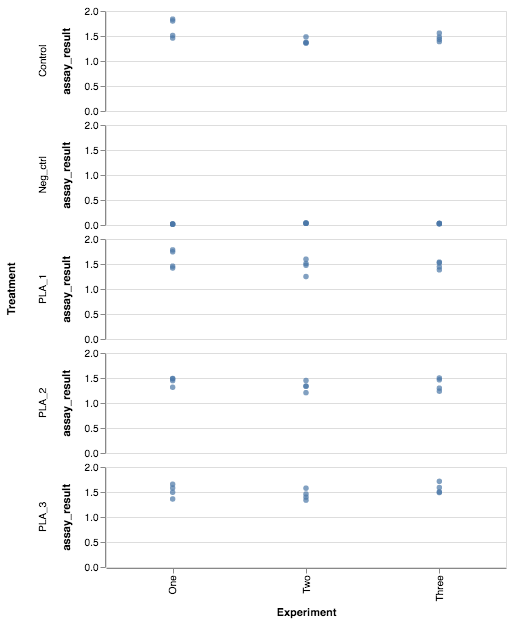

In [21]:
alt.Chart(df,
        height=100,
        width=400
    ).mark_circle(
        size=30,
        opacity=0.7
    ).encode(
        x=alt.X('Experiment:N', sort=['One', 'Two', 'Three']),
        y=alt.Y('assay_result:Q'),
        row='Treatment:N',
        tooltip=['Treatment', 'Experiment', 'assay_result']
    )

For the control group, the cell viability is around 1.3 to 1.8. For the negative control, the cell viability values are all around 0.01 to 0.04. For the PLA groups, the cell viability values range from 1.2 to 1.8.

**b)** Construct a hierarchical model describing the results. Because you are not familiar with this kind of experiment, it will be hard to construct priors. In doing so, assume that a typical assay value for a reasonably viable group of cells is about unity, and the typical baseline (absense of viable cells) does not go much beyond 0.05. Note that constructing the hierarchical model involes performing prior predictive checks. Note also that you may need to consider some pragmatic tradeoffs when doing your prior predictive checks (such as occasional unphysical results).

As you are specifying the data inputs to your model, it may be useful to know that you can change the name of a dictionary key in Python using

my_dict[new_key] = my_dict.pop[old_key]
You can also merge two dictionaries.


**c)** The authors are interested in the ratio of the PLA assay results to control. Using your hierarchical model, perform parameter estimation to compare the ratios PLA-1/control, PLA-2/control, and PLA-3/control. Hint: When you do not have much data, such as is the case here, using a noncentered parametrization is often very important.